# Test 18: Hotelling’s $T^2$-test for two series of population means

## Objective

- You have 2 groups
- Every sample in each the groups are measured along $k$ different dimensions 
- Taking some samples from each of the 2 groups, I now have an $n_1 \text{ x } k$ matrix for group 1, and $n_2 \text{ x } k$ matrix for group 2
- Based on the samples, are the two groups sufficiently different from each other?

## Assumptions

- All the variables (values in the series) are assumed to be independent of each other
- All variables follow a multivariate normal distribution
    - It is ok if the variables are correlated

## Method

### Book Method

- Let the experiment results from group 1 by $x$ and group 2 be $y$, with $n_1$ observations in $x$ and $n_2$ in $y$

- Suppose there are $k=3$ features that we want to use in our computation

- Let's compute the feature means of $x$ and $y$, giving us $\bar{x}$ and $\bar{y}$
    - In this case, $\bar{x}$ and $\bar{y}$ are arrays of length $k$ where each element represents the column means of the matrix

- Then, we need to find $k=3$ coefficients $\alpha_{1}, \alpha_{2}, \alpha_{3}$ that fulfill the following conditions:
$$\begin{aligned}
    \alpha_1 \cdot [x_{11} + y_{11}] + \alpha_2 \cdot [x_{12} + y_{12}] + \alpha_3 \cdot [x_{13} + y_{13}] &= (n_1 + n_2 - 2) \cdot (\bar{x_1} - \bar{y_1}) \\

    \alpha_1 \cdot [x_{21} + y_{21}] + \alpha_2 \cdot [x_{22} + y_{22}] + \alpha_3 \cdot [x_{23} + y_{23}] &= (n_1 + n_2 - 2) \cdot (\bar{x_2} - \bar{y_2}) \\

    \alpha_1 \cdot [x_{31} + y_{31}] + \alpha_2 \cdot [x_{32} + y_{32}] + \alpha_3 \cdot [x_{33} + y_{33}] &= (n_1 + n_2 - 2) \cdot (\bar{x_3} - \bar{y_3}) \\
\end{aligned}$$

- Let's define the following matrices:
$$\begin{aligned}
    B &= \begin{bmatrix}
        x_{00} + y_{00} & x_{01} + y_{01} & x_{02} + y_{02} \\
        x_{10} + y_{10} & x_{11} + y_{11} & x_{12} + y_{12} \\
        x_{20} + y_{20} & x_{21} + y_{21} & x_{22} + y_{22} \\
    \end{bmatrix} \\ \\

    \alpha &= \begin{bmatrix}
        \alpha_0 \\
        \alpha_1 \\
        \alpha_2
    \end{bmatrix} \\ \\ 

    N &= \begin{bmatrix}
        (n_1 + n_2 - 2) \cdot (\bar{x_0} - \bar{y_0}) \\
        (n_1 + n_2 - 2) \cdot (\bar{x_1} - \bar{y_1}) \\
        (n_1 + n_2 - 2) \cdot (\bar{x_2} - \bar{y_2}) 
    \end{bmatrix}
\end{aligned}$$

- Then to solve for $\alpha$:
$$\begin{aligned}
    B \cdot \alpha &= N \\
    \alpha &= B^{-1} N
\end{aligned}$$

- Once we know the values ofor the matrix $\alpha$, we can use it to compute Hotelling's $T^2$ statistic:
$$\begin{aligned}
    T^2 &= \frac{n_1 \cdot n_2}{n_1 + n_2} \cdot [\alpha_1 (\bar{x_0} - \bar{y_0}) + \alpha_2 (\bar{x_1} - \bar{y_1}) + \alpha_3 (\bar{x_2} - \bar{y_2})]
\end{aligned}$$

- Finally, the test statistic can be computed as
$$\begin{aligned}
    F &= \frac{n_1 + n_2 - k - 1}{k \cdot (n_1 + n_2 - 2)} \cdot T^2
\end{aligned}$$

- In this case, test statistic $F$ follows an F-distribution with $(k, n_1 + n_2 - k - 1)$ degrees of freedom, where $k$ is the number of features

### Alternative (equivalent) method

- Let the experiment results from group 1 be $x$ and group 2 be $y$ 
    - Each row is one of $n_1$ or $n_2$ observations
    - Each column is an is one of $k$ features

- Compute the mean matrices $\bar{x}, \bar{y}$, which are a $k \times 1$ matrix where each element $\bar{x_k}$ is the mean of the respective feature column $k$ in the original matrix
$$\begin{aligned}
    \bar{x_{k}} &= \frac{\sum^i x_{i,k}}{n_1} \\ 
    \bar{y_{k}} &= \frac{\sum^i y_{i,k}}{n_2}
\end{aligned}$$

- Compute the variance-covariance matrices for each of the $n \times k$ matrices.  Let's call these $S_x$ and $S_y$
    - Remember, the variance-covariance matrix is just a $k \times k$ matrix for each experiment
    - The diagonal of the variance-covariance matrix is the variance $Var[x_k]$ of a specific column $k$ in the original matrix $n \times k$ matrix $x$
    - The off diagonal elements are the covariances of the feature columns $Cov[x_{k=a}, x_{k=b}]$ in matrix $x$
$$\begin{aligned}
    Var[x_k] &= \frac{\sum^i (x_{i,k} - \bar{x_k})^2}{n_1 - 1} \\
    Cov[x_a, x_b] &= \frac{\sum (x_{i,k=a} - \bar{x_{k=a}}) \cdot (x_{i, k=b} - \bar{x_{k=b}})}{n_1 - 1} \\ 
\end{aligned}$$

- Compute the pooled sample variance-covariance matrix $S$ using
$$\begin{aligned}
    S &= \frac{(n_1 - 1) \cdot S_x + (n_2 - 1) \cdot S_y}{(n_1 - 1) + (n_2 - 1)}
\end{aligned}$$

- Using these, we compute Hotelling's $T^2$ statistic:
$$\begin{aligned}
    T^2 &= (\frac{n_1 + n_2}{n_1 \cdot n_2}) \cdot (\bar{x} - \bar{y})^T \cdot S^{-1} \cdot (\bar{x} - \bar{y})
\end{aligned}$$

- Finally, the test statistic is the following transformation of $T^2$
$$\begin{aligned}
    F &= \frac{n_1 + n_2 - k  - 1}{k \cdot (n_1 + n_2 - 2)} \cdot T^2
\end{aligned}$$

- $F$ follows an $F$ distribution with $(k, n_1 + n_2 - k - 1)$ degrees of freedom

## Example

- Problem
    - Two sets of visual stimulus are applied in two experiments on young male and female volunteer students. 
    - A researcher wishes to know if the multivariate pattern of responses is the same for males and females. 

## Proof by simulation that the test statistic follows an $F$ distribution

### Book Method

In [15]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix

In [16]:
SAMPLE_SIZE_1 = 100
SAMPLE_SIZE_2 = 123
N_FEATURES = 3

MEANS = np.random.normal(0,10,N_FEATURES)

## variance covariance matrix must be symmetric, and positive definite
COV = make_spd_matrix(N_FEATURES) 

In [33]:
def compute_covariance(matrix, index1, index2):
    cov = np.sum(
        (matrix[:, index1] - np.mean(matrix[:, index1])) * 
        (matrix[:, index2] - np.mean(matrix[:, index2]))
    )
    return cov

def make_variance_covariance_matrix(matrix, n_features):
    B = np.array([
        compute_covariance(matrix, i, j) 
        for j in range(n_features) 
        for i in range(n_features)
    ]).reshape(N_FEATURES, N_FEATURES)
    
    for i in range(n_features):
        for j in range(n_features):
            assert B[i,j] == B[j,i]
    return B

def get_test_statistic_book_method():

    x = np.random.multivariate_normal(MEANS, COV, size=SAMPLE_SIZE_1)
    y = np.random.multivariate_normal(MEANS, COV, size=SAMPLE_SIZE_2)

    xbar = np.mean(x, axis=0)
    ybar = np.mean(y, axis=0)

    B = make_variance_covariance_matrix(x, N_FEATURES)
    print(B)
    B_inv = np.linalg.inv(B)
    N = np.array([
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2) * (xbar[0] - ybar[0]),
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2) * (xbar[1] - ybar[1]),
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2) * (xbar[2] - ybar[2]),
    ]).reshape(N_FEATURES, -1)

    alpha = B_inv @ N

    t_sq = (
        ((SAMPLE_SIZE_1 * SAMPLE_SIZE_2)/(SAMPLE_SIZE_1 + SAMPLE_SIZE_2)) *
        (
            (alpha[0] * (xbar[0] - ybar[0])) +
            (alpha[1] * (xbar[1] - ybar[1])) +
            (alpha[2] * (xbar[2] - ybar[2])) 
        )
    )

    test_statistic = (
        ((SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - N_FEATURES - 1) / 
        (N_FEATURES * (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2))) *
        t_sq
    )

    return test_statistic[0]

get_test_statistic_book_method()

3.140818306531549

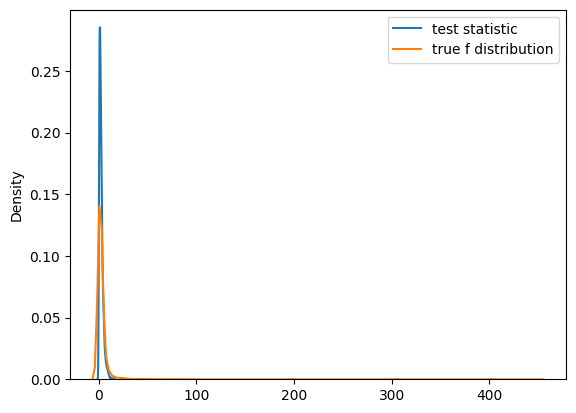

In [35]:
test_statistic_distribution = [get_test_statistic_book_method() for _ in range(3_000)]
true_f_distribution = np.random.f(
    dfnum=N_FEATURES, 
    dfden=SAMPLE_SIZE_1+SAMPLE_SIZE_2-N_FEATURES-1,
    size=3_000
)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_f_distribution, label='true f distribution')
plt.legend()

### Alternative (equivalent) method

In [10]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix

In [14]:
SAMPLE_SIZE_1 = 100
SAMPLE_SIZE_2 = 123
N_FEATURES = 3

MEANS = np.random.normal(0,10,N_FEATURES)

## variance covariance matrix must be symmetric, and positive definite
COV = make_spd_matrix(N_FEATURES) 

In [9]:
# def get_test_statistic_book_method():
x1 = np.random.multivariate_normal(mean=MEANS, cov=COV, size=SAMPLE_SIZE_1)
x2 = np.random.multivariate_normal(mean=MEANS, cov=COV, size=SAMPLE_SIZE_2)

def compute_covariance(matrix, index1, index2):
    cov_ij = np.sum(
        (matrix[:,index1] - np.mean(matrix[:,index1], axis=0)) * 
        (matrix[:,index2] - np.mean(matrix[:,index2], axis=0))
    )
    return cov_ij

cov_00_x1 = compute_covariance(x1, 0, 0)
cov_01_x1 = cov_10_x1 = compute_covariance(x1, 0, 1)
cov_02_x1 = cov_20_x1 = compute_covariance(x1, 0, 2)
cov_11_x1 = compute_covariance(x1, 1, 1)
cov_12_x1 = cov_21_x1 = compute_covariance(x1, 1, 2)
cov_22_x1 = compute_covariance(x1, 2, 2)



In [12]:
def get_test_statistic_equivalent_method():
    x1 = np.random.multivariate_normal(mean=MEANS, cov=COV, size=SAMPLE_SIZE_1)
    x2 = np.random.multivariate_normal(mean=MEANS, cov=COV, size=SAMPLE_SIZE_2)

    x1bar = np.mean(x1, axis=0)
    x2bar = np.mean(x2, axis=0)
    x1cov = np.cov(x1, rowvar=False, ddof=1)
    x2cov = np.cov(x2, rowvar=False, ddof=1)

    pooled_cov = (
        (((SAMPLE_SIZE_1 - 1) * x1cov) + ((SAMPLE_SIZE_2 - 1) * x2cov)) /
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2)
    )
    
    t_sq = (
        (
            (SAMPLE_SIZE_1 * SAMPLE_SIZE_2)/
            (SAMPLE_SIZE_1 + SAMPLE_SIZE_2)
        ) *
        (
            ((x1bar - x2bar).reshape(1,-1) @
            np.linalg.inv(pooled_cov)) @
            (x1bar - x2bar).reshape(-1,1)
        )
        
    )[0][0]

    F = (
        (((SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - N_FEATURES - 1)) /
        (N_FEATURES * (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2))) *
        t_sq
    )

    return F

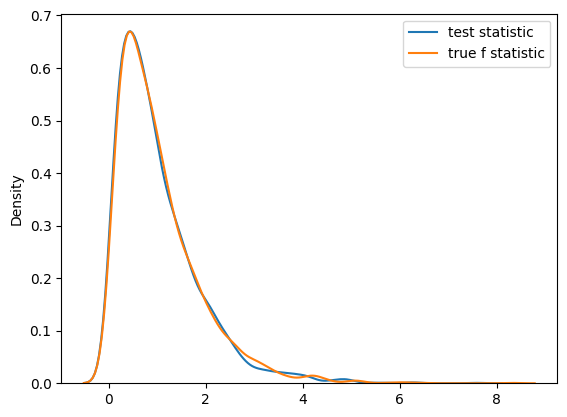

In [13]:
test_statistic_distribution = [get_test_statistic_equivalent_method() for _ in range(3_000)]
true_f_distribution = np.random.f(
    dfnum=N_FEATURES, 
    dfden=SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - N_FEATURES - 1, 
    size=3_000
)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_f_distribution, label='true f statistic')
plt.legend()